# Stochastic Optimizer Comparison: *classification with Mnist*

In [1]:
%matplotlib inline
import stochastic_optimizer
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# Original Mnist
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, data_home='.')
X, y = [mnist.data, mnist.target]
X = X/X.max()

In [2]:
print(X.shape, X.max(), X.min())
print(y.shape, y[0:10])

(70000, 784) 1.0 0.0
(70000,) ['5' '0' '4' '1' '9' '2' '1' '3' '1' '4']


## Hyperparamer grid search

In [7]:
classifiers = [
    ("SGD",
     stochastic_optimizer.estimator.SGDClassifier(n_jobs=10, penalty='l1', warm_start=True),
     {'eta0': np.linspace(0.00005, 0.5, 15), 'power_t': [0.5, 1], 'alpha': np.linspace(0, 0.001, 10)}),
    ("AdaGrad",
     stochastic_optimizer.estimator.AdaGradClassifier(n_jobs=10, penalty='l1', warm_start=True),
     {'eta0': np.linspace(0.00005, 0.5, 15), 'alpha': np.linspace(0, 0.001, 10)}),
    ("RMSprop",
     stochastic_optimizer.estimator.RMSpropClassifier(n_jobs=10, warm_start=True),
     {'eta0': np.linspace(0.00005, 0.5, 15), 'var_w': np.linspace(0.01, 1, 10)}),
    ("Adam",
     stochastic_optimizer.estimator.AdamClassifier(n_jobs=10, penalty='l1', warm_start=True),
     {'eta0': np.linspace(0.00005, 0.5, 15), 'var_w': np.linspace(0.01, 1, 10), 'alpha': np.linspace(0, 0.001, 10)}),
    ("AdaDelta",
     stochastic_optimizer.estimator.AdaDeltaClassifier(n_jobs=10, penalty='l1', warm_start=True),
     {'eps_': [10**i for i in np.linspace(-10, -1, 15)], 'rms':[True, False], 'var_w': np.linspace(0.01, 1, 10), 'alpha': np.linspace(0, 0.001, 10)}),
    ("RDA",
     stochastic_optimizer.estimator.SDAClassifier(n_jobs=10, penalty='l1', warm_start=True),
     {'eta0': np.linspace(0.00005, 0.5, 15), 'alpha': np.linspace(0, 0.001, 10)}),
    ("PDA",
     stochastic_optimizer.estimator.PDAClassifier(n_jobs=10, penalty='l1', warm_start=True),
     {'eta0': np.linspace(0.00005, 0.5, 15), 'alpha': np.linspace(0, 0.001, 10)})
]

stochastic_optimizer.framework.GridSearch(X[0:10000, :], y[0:10000], classifiers, scoring="accuracy")

2019-12-30 01:57:43,732 root         INFO     *** start grid search (['SGD', 'AdaGrad', 'RMSprop', 'Adam', 'AdaDelta', 'RDA', 'PDA']) ***
2019-12-30 01:57:43,734 root         INFO      - searching: SGD
2019-12-30 02:14:43,534 root         INFO            warm_start:True
2019-12-30 02:14:43,539 root         INFO            penalty:l1
2019-12-30 02:14:43,540 root         INFO            n_jobs:10
2019-12-30 02:14:43,542 root         INFO            fit_intercept:True
2019-12-30 02:14:43,543 root         INFO            eta0:0.5
2019-12-30 02:14:43,544 root         INFO            eps_:1e-06
2019-12-30 02:14:43,545 root         INFO            alpha:0.00011111111111111112
2019-12-30 02:14:43,546 root         INFO            power_t:0.5
2019-12-30 02:14:43,547 root         INFO            loss:log
2019-12-30 02:14:43,548 root         INFO      - searching: AdaGrad
2019-12-30 02:24:31,946 root         INFO            warm_start:True
2019-12-30 02:24:31,948 root         INFO            penal

## Linear model training

2019-12-30 10:19:50,237 root         INFO     *** Learning Curve Test ***
2019-12-30 10:19:50,238 root         INFO     input shape: 70000, 784
2019-12-30 10:19:50,241 root         INFO     output shape: 70000
2019-12-30 10:19:50,243 root         INFO     train size: 69300.00
2019-12-30 10:19:50,244 root         INFO      training SGD
2019-12-30 10:19:50,245 root         INFO       rounds 1 / 50
2019-12-30 10:21:12,499 root         INFO       rounds 2 / 50
2019-12-30 10:22:33,858 root         INFO       rounds 3 / 50
2019-12-30 10:23:55,009 root         INFO       rounds 4 / 50
2019-12-30 10:25:16,272 root         INFO       rounds 5 / 50
2019-12-30 10:26:37,989 root         INFO       rounds 6 / 50
2019-12-30 10:27:59,114 root         INFO       rounds 7 / 50
2019-12-30 10:29:21,161 root         INFO       rounds 8 / 50
2019-12-30 10:30:42,688 root         INFO       rounds 9 / 50
2019-12-30 10:32:04,926 root         INFO       rounds 10 / 50
2019-12-30 10:33:26,908 root         INFO 

2019-12-30 13:10:24,653 root         INFO       rounds 25 / 50
2019-12-30 13:11:50,315 root         INFO       rounds 26 / 50
2019-12-30 13:13:15,505 root         INFO       rounds 27 / 50
2019-12-30 13:14:39,830 root         INFO       rounds 28 / 50
2019-12-30 13:16:04,414 root         INFO       rounds 29 / 50
2019-12-30 13:17:28,952 root         INFO       rounds 30 / 50
2019-12-30 13:18:53,254 root         INFO       rounds 31 / 50
2019-12-30 13:20:17,574 root         INFO       rounds 32 / 50
2019-12-30 13:21:41,525 root         INFO       rounds 33 / 50
2019-12-30 13:23:06,489 root         INFO       rounds 34 / 50
2019-12-30 13:24:29,968 root         INFO       rounds 35 / 50
2019-12-30 13:25:55,281 root         INFO       rounds 36 / 50
2019-12-30 13:27:19,574 root         INFO       rounds 37 / 50
2019-12-30 13:28:45,297 root         INFO       rounds 38 / 50
2019-12-30 13:30:10,340 root         INFO       rounds 39 / 50
2019-12-30 13:31:36,408 root         INFO       rounds 

2019-12-30 16:28:31,369 root         INFO       rounds 3 / 50
2019-12-30 16:29:55,715 root         INFO       rounds 4 / 50
2019-12-30 16:31:19,661 root         INFO       rounds 5 / 50
2019-12-30 16:32:42,840 root         INFO       rounds 6 / 50
2019-12-30 16:34:07,494 root         INFO       rounds 7 / 50
2019-12-30 16:35:30,623 root         INFO       rounds 8 / 50
2019-12-30 16:36:53,502 root         INFO       rounds 9 / 50
2019-12-30 16:38:17,477 root         INFO       rounds 10 / 50
2019-12-30 16:39:41,111 root         INFO       rounds 11 / 50
2019-12-30 16:41:04,778 root         INFO       rounds 12 / 50
2019-12-30 16:42:27,753 root         INFO       rounds 13 / 50
2019-12-30 16:43:51,747 root         INFO       rounds 14 / 50
2019-12-30 16:45:16,704 root         INFO       rounds 15 / 50
2019-12-30 16:46:40,039 root         INFO       rounds 16 / 50
2019-12-30 16:48:03,120 root         INFO       rounds 17 / 50
2019-12-30 16:49:27,017 root         INFO       rounds 18 / 50

2019-12-30 18:59:54,242 root         INFO       rounds 32 / 50
2019-12-30 19:00:58,199 root         INFO       rounds 33 / 50
2019-12-30 19:02:02,981 root         INFO       rounds 34 / 50
2019-12-30 19:03:06,625 root         INFO       rounds 35 / 50
2019-12-30 19:04:11,153 root         INFO       rounds 36 / 50
2019-12-30 19:05:15,881 root         INFO       rounds 37 / 50
2019-12-30 19:06:20,033 root         INFO       rounds 38 / 50
2019-12-30 19:07:25,268 root         INFO       rounds 39 / 50
2019-12-30 19:08:30,203 root         INFO       rounds 40 / 50
2019-12-30 19:09:33,898 root         INFO       rounds 41 / 50
2019-12-30 19:10:37,416 root         INFO       rounds 42 / 50
2019-12-30 19:11:41,840 root         INFO       rounds 43 / 50
2019-12-30 19:12:46,908 root         INFO       rounds 44 / 50
2019-12-30 19:13:51,559 root         INFO       rounds 45 / 50
2019-12-30 19:14:56,226 root         INFO       rounds 46 / 50
2019-12-30 19:16:01,631 root         INFO       rounds 

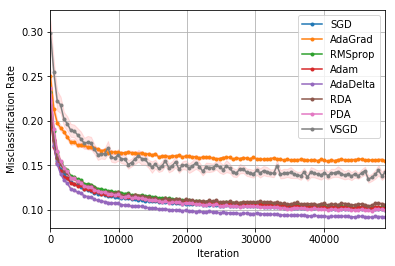

In [5]:
classifiers = [
    ("SGD", stochastic_optimizer.estimator.SGDClassifier(
        n_jobs=10, warm_start=True, eta0=0.5, penalty='l1', alpha=0.0001, power_t=0.5)),
    ("AdaGrad", stochastic_optimizer.estimator.AdaGradClassifier(
        n_jobs=10, warm_start=True, eta0=0.0357, penalty='l1', alpha=0.0006)),
    ("RMSprop", stochastic_optimizer.estimator.RMSpropClassifier(
        n_jobs=10, warm_start=True, eta0=0.0357, var_w=0.89)),
    ("Adam", stochastic_optimizer.estimator.AdamClassifier(
        n_jobs=10, warm_start=True, eta0=0.0357, penalty='l1', alpha=0.0002, var_w=0.45)),
    ("AdaDelta", stochastic_optimizer.estimator.AdaDeltaClassifier(
        n_jobs=10, warm_start=True, penalty=None, var_w=0.01, eps_=7.2e-07)),
    ("RDA", stochastic_optimizer.estimator.SDAClassifier(
        n_jobs=10, warm_start=True, eta0=0.0357, penalty='l1', alpha=0.0003)),
    ("PDA", stochastic_optimizer.estimator.PDAClassifier(
        n_jobs=10, warm_start=True, eta0=0.1786, penalty='l1', alpha=0.0007)),
    ("VSGD", stochastic_optimizer.estimator.VSGDClassifier(n_jobs=10, warm_start=True))
]

fig = stochastic_optimizer.framework.LearningCurveClassifier(
    X, y, classifiers, rounds=50, split=100, path='example_results/linear_model_mnist')

In [15]:
import json
mc_rate = json.load(open('./example_results/linear_model_mnist/misclassification_rate.json'))
print('Misclassification error: mean (std)')
for k, v in mc_rate.items():
    ave = v['mean'][-1]
    std = v['std'][-1]
    print('- %s: %0.4f (%0.4f)' % (k, ave, std))

Misclassification error: mean (std)
- RMSprop: 0.1146 (0.0019)
- Adam: 0.1118 (0.0018)
- PDA: 0.1118 (0.0016)
- SGD: 0.1103 (0.0019)
- AdaDelta: 0.1027 (0.0017)
- AdaGrad: 0.1627 (0.0020)
- VSGD: 0.1543 (0.0023)
- RDA: 0.1149 (0.0017)
